## Contents
    1. Importing libraries and data
    2. Data cleaning
    3. The elbow technique
    4. k-means clustering

# 01. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl# PyLab is a convenience module that bulk imports matplotlib.

In [2]:
#Importing data
path=r'C:\Users\munav\Desktop\bootcamps\Achievement 6\US Car Accidents'
sub_hour=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'City_accidents_per_hour.pkl'))

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
sub_hour.shape

(1749243, 16)

# 02. Data cleaning

In [5]:
sub_hour.head()

,Date,Hour,State,County,City,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,_merge,Temp_category
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,both,Very Cold
1,2016-02-08,1,Ohio,Franklin,Dublin,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,both,Normal
2,2016-02-08,6,Ohio,Hamilton,Cincinnati,1,36.000000,97.0,29.700001,10.0,NaN,0.02,0.055,2.0,both,Normal
3,2016-02-08,6,Ohio,Montgomery,Dayton,1,36.900002,91.0,29.680000,10.0,NaN,0.02,0.747,2.0,both,Normal
4,2016-02-08,7,Ohio,Summit,Akron,1,39.000000,55.0,29.650000,10.0,NaN,NaN,0.123,2.0,both,Normal


In [6]:
#Creating a subset without categorical variables
sub_hour_clean=sub_hour.drop(columns=['Date','State', 'County', 'City','_merge', 'Temp_category'])

In [7]:
#Deleting outlier
sub_hour_clean.loc[sub_hour_clean['Avg_temp_per_hour']>170,'Avg_temp_per_hour']=np.nan

In [8]:
#Deleting missing values
sub_hour_clean=sub_hour_clean.dropna()

In [9]:
sub_hour_clean.shape

(1404389, 10)

# 03. The Elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(sub_hour_clean).score(sub_hour_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1359186075.5524614,
 -726572666.9438628,
 -552917111.9307106,
 -450058306.5253951,
 -371726194.2428268,
 -335951383.1463355,
 -301825252.5817722,
 -277980664.56048757,
 -259381028.71873915]

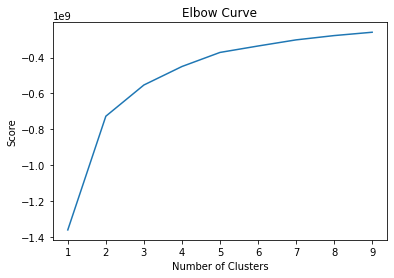

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve straiten outs after 3 on the x-axis meaning that 3 is the optimal number for clusters.

# 04. K-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [14]:
# Fit the k-means object to the data.

kmeans.fit(sub_hour_clean)

KMeans(n_clusters=3)

In [15]:
sub_hour_clean['clusters'] = kmeans.fit_predict(sub_hour_clean)

In [16]:
sub_hour_clean.head()

,Hour,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,clusters
0,20,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,0
1,1,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,0
6,8,1,37.000000,93.0,29.690001,10.0,10.4,0.01,0.500,3.0,0
8,12,1,33.099998,92.0,29.629999,0.5,3.5,0.08,0.521,2.0,0
10,15,1,32.000000,100.0,29.590000,0.5,3.5,0.05,0.826,2.0,0


In [17]:
sub_hour_clean['clusters'].value_counts()

2    506010
1    497979
0    400400
Name: clusters, dtype: int64

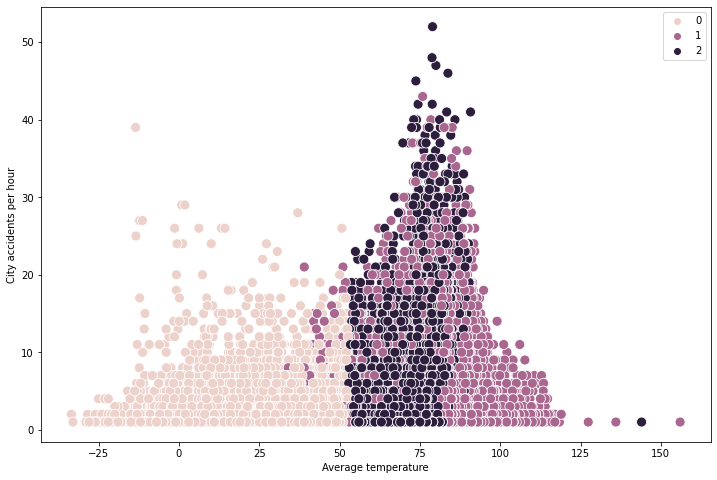

In [18]:
# Plot the clusters for the "Average temperature per hour" and "City accidents per hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_hour_clean['Avg_temp_per_hour'], y=sub_hour_clean['City_accidents_per_hour'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average temperature') # Label x-axis.
plt.ylabel('City accidents per hour') # Label y-axis.
plt.show()

#### Here we can see that the city accidents were clustered based on the temperature. The beige cluster represents the accidents which happened when the average temperature was between -10F and 50F, purple cluster - between 50F and 140F, while pink cluster - between 30F and 160F. We can notice that the purple cluster contains the highest number of accidents, leading to the assumption that the frequency of accidents is higher during the warm weather and decreases as it becomes colder or hotter.

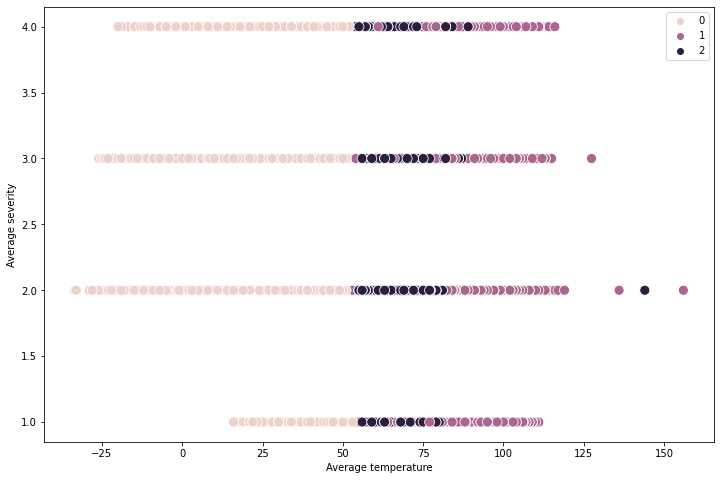

In [19]:
# Plot the clusters for the "Average temperature per hour" and "Average severity per hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_hour_clean['Avg_temp_per_hour'], y=sub_hour_clean['Avg_severity_per_hour'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average temperature') # Label x-axis.
plt.ylabel('Average severity') # Label y-axis.
plt.show()

#### Here we can see that the accidents which happened during the temperature below 15F had severity above 1.

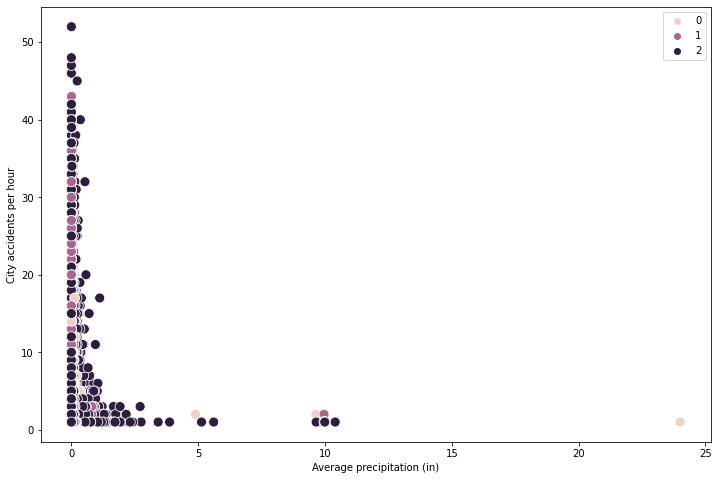

In [20]:
# Plot the clusters for the "Average precipitation per hour" and "City accidents oer hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_hour_clean['Avg_precip_per_hour'], y=sub_hour_clean['City_accidents_per_hour'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average precipitation (in)') # Label x-axis.
plt.ylabel('City accidents per hour') # Label y-axis.
plt.show()

#### It is clear that most of the accidents happen when there is no or a little precipitation.

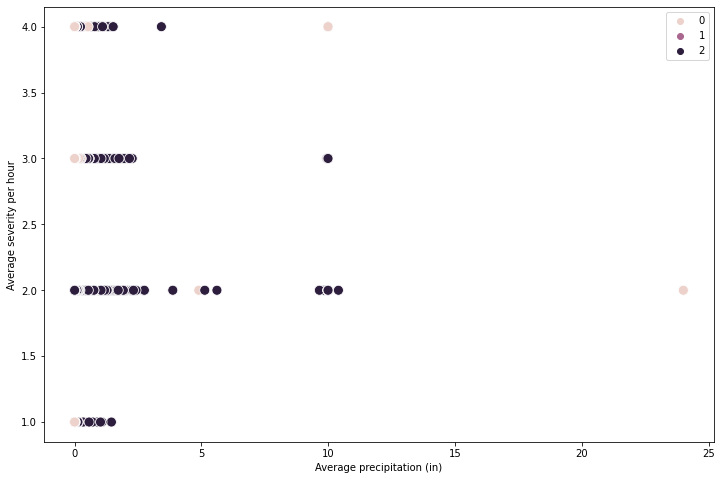

In [21]:
# Plot the clusters for the "Average precipitation per hour" and "Average severity per hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_hour_clean['Avg_precip_per_hour'], y=sub_hour_clean['Avg_severity_per_hour'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average precipitation (in)') # Label x-axis.
plt.ylabel('Average severity per hour') # Label y-axis.
plt.show()

In [27]:
sub_hour_clean.loc[sub_hour_clean['clusters'] == 2, 'cluster'] = 'purple'
sub_hour_clean.loc[sub_hour_clean['clusters'] == 1, 'cluster'] = 'pink'
sub_hour_clean.loc[sub_hour_clean['clusters'] == 0, 'cluster'] = 'beige'


In [28]:
sub_hour_clean.groupby('cluster').agg({'City_accidents_per_hour':['mean', 'median'], 
                         'Avg_temp_per_hour':['mean', 'median'], 
                         'Avg_precip_per_hour':['mean', 'median'],
                          'Avg_windmph_per_hour':['mean', 'median'], 
                         'Avg_visibility_per_hour':['mean', 'median'],
                          'Avg_pressure_per_hour':['mean', 'median'],
                        'Avg_humid_per_hour':['mean', 'median'],
                        'Avg_distance_per_hour':['mean', 'median'],
                         'Avg_severity_per_hour':['mean', 'median']})

City_accidents_per_hour        Avg_temp_per_hour         \
                           mean median              mean median   
cluster                                                           
beige                  1.273367    1.0         38.387859   41.0   
pink                   1.369164    1.0         71.413094   72.0   
purple                 1.428920    1.0         68.008881   67.0   

        Avg_precip_per_hour        Avg_windmph_per_hour         \
                       mean median                 mean median   
cluster                                                          
beige              0.006532    0.0             6.583225    6.0   
pink               0.000182    0.0             8.336276    8.0   
purple             0.010891    0.0             6.589556    6.0   

        Avg_visibility_per_hour        Avg_pressure_per_hour             \
                           mean median                  mean     median   
cluster                                                                   
beige                  8.197265   10.0             29.185890  29.620001   
pink                   9.938581   10.0             29.237665  29.700001   
purple                 8.944614   10.0             29.678545  29.850000   

        Avg_humid_per_hour        Avg_distance_per_hour            \
                      mean median                  mean    median   
cluster                                                             
beige            78.618050   81.0              0.781105  0.257333   
pink             38.335831   40.0              0.685901  0.231000   
purple           78.383575   78.0              0.697914  0.241000   

        Avg_severity_per_hour         
                         mean median  
cluster                               
beige                2.128729    2.0  
pink                 2.115139    2.0  
purple               2.124096    2.0

#### As it was mentioned above kmeans clustering mainly highlighted the fact that the frequency of car accidents is higher (purple cluster) when the average temperature is warm, not too cold or too hot, the other factors seem to not affect the car accidents. It was also found that the severity of car accidents are higher during colder weather.

#### This analysis emphasizes the need to analyze other factors affecting the car accidents and further analyze why most of the accidents happen during the normal weather. There are also categorical variables which weren't yet analyzed during these exercises, they could also provide important insights into the causes of car accidents and their severity.